<a href="https://colab.research.google.com/github/muskangupta042002/Aritificial-Neural-Network/blob/master/Deep_Learning_Components_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://upload.wikimedia.org/wikipedia/commons/1/11/TensorFlowLogo.svg "TensorFlow")

                                                                                                        Source - Wikipedia

### Table of Content

1. [Deep Learning Basics](#section1)<br>
2. [Experiment with Components](#section2)<br>

<a id=section1></a>

# Deep Learning Basics

* This notebook is intended to give you a __thorough insight into training deep learning models.__
* You will also get to know __how different hyperparameters are changed__ and __how they affect the model.__

## 1. Import the Libraries

In [1]:
import time
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

## 2. Set Random Seed for Reproducibility

In [2]:
np.random.seed(903)

## 3. Load MNIST

Keras provides very __convenient means of loading the dataset__ as well as doing the __data slicing__ as shown below.

Note - It is customary to name the attributes X (matrix) in upper-case and the label y (vector) in lower-case.

In [3]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols

print("Number of training samples: %d"%train_features.shape[0])
print("Number of test samples: %d"%test_features.shape[0])
print("Image rows: %d"%train_features.shape[1])
print("Image columns: %d"%train_features.shape[2])
print("Number of classes: %d"%num_classes)

11493376/11490434 [==============================] - 0s 0us/step
Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


## 4. Show Examples from Each Class

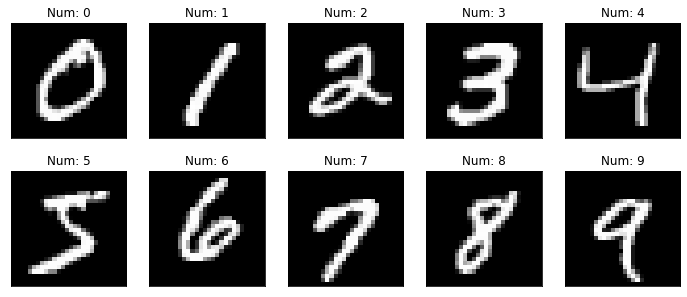

In [4]:
fig = plt.figure(figsize=(12,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[0], cmap="gray")
plt.show()

## 5. Pre-processing

In [5]:
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols) #X_train
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols) #X_test

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes) # y_train
test_labels = np_utils.to_categorical(test_labels, num_classes) # y_test

## 6. Define Neural Network Model

In [6]:
def simple_nn():
    # initialize model
    model = Sequential()
    
    # add an input layer and a hidden layer
    model.add(Dense(units=100, activation='sigmoid', input_dim = num_input_nodes))
    # add output layer
    model.add(Dense(units=num_classes, activation='softmax'))
    return model

Check the model summary - 

In [7]:
# define model by calling the function created above
model = simple_nn()

# define optimizer
sgd = SGD(lr=0.01)

# Compiling the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# print model information
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 7. Train the Model

In [8]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                     batch_size=64,
                     epochs=10, 
                     verbose=2, 
                     validation_split=0.2)
end = time.time()

total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

Epoch 1/10
750/750 - 1s - loss: 0.0858 - accuracy: 0.2690 - val_loss: 0.0796 - val_accuracy: 0.3518
Epoch 2/10
750/750 - 1s - loss: 0.0752 - accuracy: 0.4125 - val_loss: 0.0711 - val_accuracy: 0.4641
Epoch 3/10
750/750 - 1s - loss: 0.0678 - accuracy: 0.4902 - val_loss: 0.0642 - val_accuracy: 0.5359
Epoch 4/10
750/750 - 1s - loss: 0.0615 - accuracy: 0.5629 - val_loss: 0.0578 - val_accuracy: 0.6100
Epoch 5/10
750/750 - 1s - loss: 0.0557 - accuracy: 0.6313 - val_loss: 0.0519 - val_accuracy: 0.6749
Epoch 6/10
750/750 - 1s - loss: 0.0502 - accuracy: 0.6956 - val_loss: 0.0463 - val_accuracy: 0.7432
Epoch 7/10
750/750 - 1s - loss: 0.0449 - accuracy: 0.7518 - val_loss: 0.0412 - val_accuracy: 0.7854
Epoch 8/10
750/750 - 1s - loss: 0.0404 - accuracy: 0.7869 - val_loss: 0.0372 - val_accuracy: 0.8114
Epoch 9/10
750/750 - 1s - loss: 0.0370 - accuracy: 0.8069 - val_loss: 0.0342 - val_accuracy: 0.8282
Epoch 10/10
750/750 - 1s - loss: 0.0343 - accuracy: 0.8226 - val_loss: 0.0318 - val_accuracy: 0.8397

In [9]:
from pprint import pprint as pp  # Pretty Print

In [10]:
pp(model_info.history)

{'accuracy': [0.26897916197776794,
              0.4125416576862335,
              0.49020832777023315,
              0.5629166960716248,
              0.6312708258628845,
              0.695604145526886,
              0.7517916560173035,
              0.7868541479110718,
              0.8069375157356262,
              0.8226249814033508],
 'loss': [0.0857587456703186,
          0.07523305714130402,
          0.06784918904304504,
          0.06147606298327446,
          0.05565732717514038,
          0.050152380019426346,
          0.0448753796517849,
          0.04044770076870918,
          0.03699634224176407,
          0.03425322845578194],
 'val_accuracy': [0.3518333435058594,
                  0.46408334374427795,
                  0.5359166860580444,
                  0.6100000143051147,
                  0.674916684627533,
                  0.7431666851043701,
                  0.7854166626930237,
                  0.8114166855812073,
                  0.828166663646698,
       

## 8. Plot Accuracy and Loss

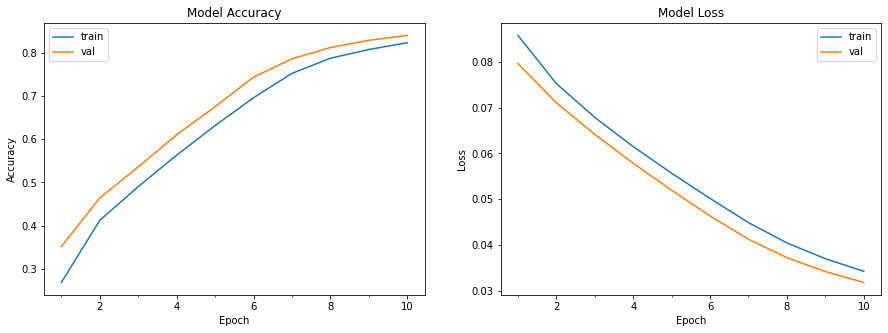

In [11]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(model_info)

<a id=section2></a>

# Experiment with Components

## 1. Original Model Testing

In [12]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (round(accuracy * 100, 2))

In [13]:
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

Accuracy on Test data is: 83.47%


### Observation - 
* Both __training and validation accuracy increase as the number of epochs increase.__ 
* More information is learned in each epoch.

## 2. Vary the Learning Rate

### Decrease the learning rate - 

In [14]:
# define model
model = simple_nn()

# define optimizer
sgd = SGD(lr=0.001)  # Learning Rate used in the earlier model was 0.01

# Compiling the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

Train the model again with new learning rate

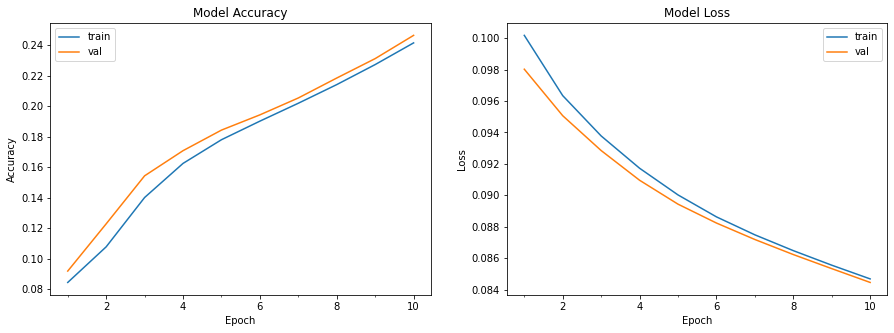

Model took 11.26 seconds to train
Accuracy on Test data is: 25.34%


In [15]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=64,
                       epochs=10, 
                       verbose=0, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Increase the learning rate -

In [16]:
# define model
model = simple_nn()

# define optimizer
sgd = SGD(lr=0.1)  # Learning Rate used in the earlier model was 0.01

# Compiling the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

Train the model again with new learning rate

Epoch 1/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0546 - accuracy: 0.6209 - val_loss: 0.0325 - val_accuracy: 0.8271
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0276 - accuracy: 0.8490 - val_loss: 0.0217 - val_accuracy: 0.8836
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0211 - accuracy: 0.8815 - val_loss: 0.0182 - val_accuracy: 0.8972
Epoch 4/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0182 - accuracy: 0.8941 - val_loss: 0.0164 - val_accuracy: 0.9050
Epoch 5/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0164 - accuracy: 0.9027 - val_loss: 0.0149 - val_accuracy: 0.9107
Epoch 6/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9096 - val_loss: 0.0142 - val_accuracy: 0.9133
Epoch 7/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9141 - val_loss: 0.0135 - val_accuracy: 0.9176
Epoch 

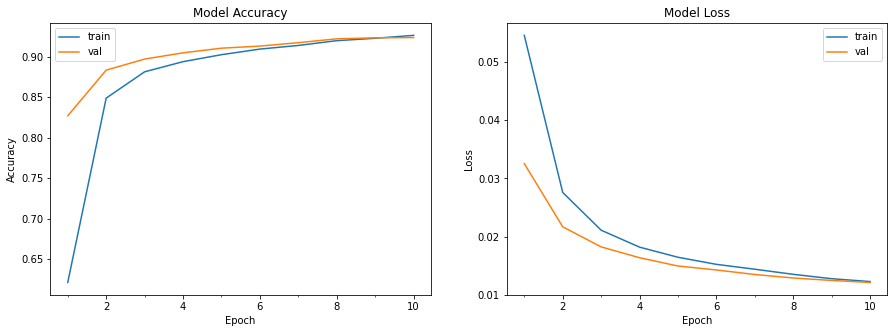

Model took 13.25 seconds to train
Accuracy on Test data is: 92.49%


In [17]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=64,
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
* If the __learning rate is decreased__, __less information is learned__ in each epoch and __more epochs are required to learn a good model.__ 
* If the __learning rate is increased, more information is learned__ in each epoch and __less epochs are required to learn a good model.__

## 3. Use Adam Optimizer instead of SGD

In [18]:
# Define model
model = simple_nn()

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0285 - accuracy: 0.8222 - val_loss: 0.0177 - val_accuracy: 0.8954
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0168 - accuracy: 0.8976 - val_loss: 0.0148 - val_accuracy: 0.9062
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0153 - accuracy: 0.9046 - val_loss: 0.0133 - val_accuracy: 0.9155
Epoch 4/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0141 - accuracy: 0.9109 - val_loss: 0.0146 - val_accuracy: 0.9111
Epoch 5/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0146 - accuracy: 0.9077 - val_loss: 0.0133 - val_accuracy: 0.9157
Epoch 6/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0135 - accuracy: 0.9129 - val_loss: 0.0129 - val_accuracy: 0.9172
Epoch 7/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0136 - accuracy: 0.9126 - val_loss: 0.0130 - val_accuracy: 0.9155
Epoch 

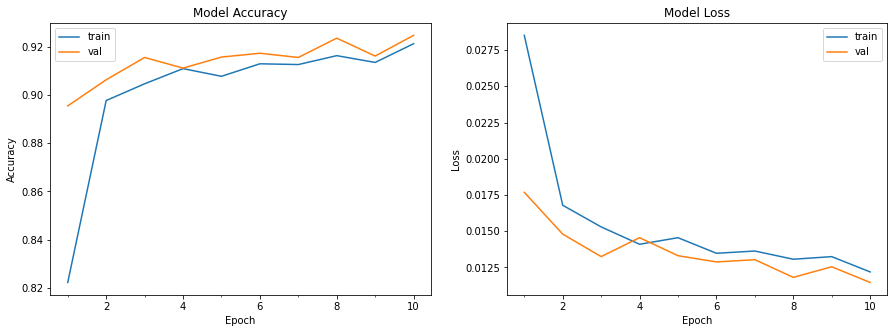

Model took 14.52 seconds to train
Accuracy on Test data is: 92.15%


In [19]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=64,
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
Using Adam optimizer, we __don’t need to specify a learning rate. However, the training time increases.__

## 4. Vary the Batch Size

### Decreasing the Batch Size to - 32

In [20]:
# Define model
model = simple_nn()

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Epoch 1/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0275 - accuracy: 0.8310 - val_loss: 0.0173 - val_accuracy: 0.8928
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0181 - accuracy: 0.8882 - val_loss: 0.0174 - val_accuracy: 0.8922
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0169 - accuracy: 0.8939 - val_loss: 0.0157 - val_accuracy: 0.8999
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0155 - accuracy: 0.9019 - val_loss: 0.0146 - val_accuracy: 0.9063
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0152 - accuracy: 0.9024 - val_loss: 0.0134 - val_accuracy: 0.9130
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0140 - accuracy: 0.9086 - val_loss: 0.0130 - val_accuracy: 0.9130
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0140 - accuracy: 0.9071 - val_loss: 0.0125 - val_accuracy:

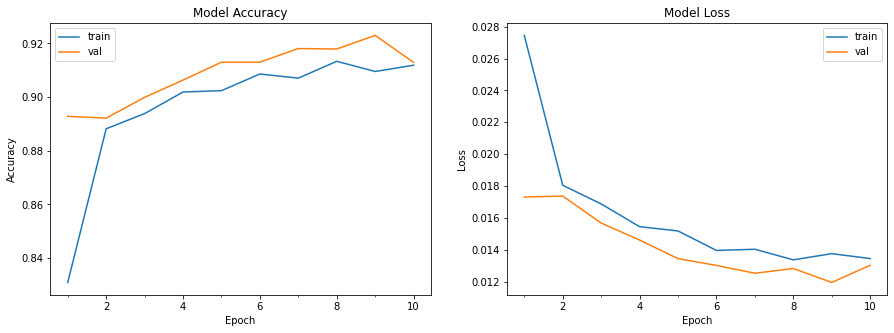

Model took 23.71 seconds to train
Accuracy on Test data is: 91.13%


In [21]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=32,  # The batch-size in earlier models was 64
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
Decreasing the batch size __increases the training time while increasing the rate of learning.__

### Increasing the Batch Size to - 128

In [22]:
# Define model
model = simple_nn()

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Fitting the model

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.8068 - val_loss: 0.0169 - val_accuracy: 0.8989
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0166 - accuracy: 0.8977 - val_loss: 0.0143 - val_accuracy: 0.9122
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0145 - accuracy: 0.9104 - val_loss: 0.0130 - val_accuracy: 0.9192
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 0.9148 - val_loss: 0.0130 - val_accuracy: 0.9184
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 0.9148 - val_loss: 0.0120 - val_accuracy: 0.9220
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0127 - accuracy: 0.9200 - val_loss: 0.0117 - val_accuracy: 0.9267
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0122 - accuracy: 0.9233 - val_loss: 0.0112 - val_accuracy: 0.9286
Epoch 

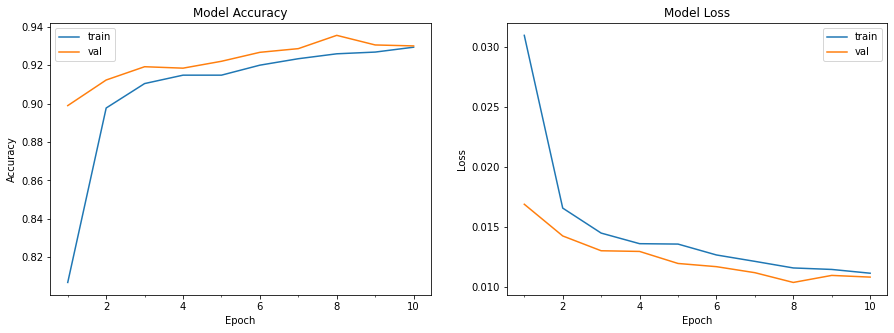

Model took 10.92 seconds to train
Accuracy on Test data is: 92.87%


In [23]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128,  # The batch-size in earlier models was 64
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
Increasing the batch size __decreases the training time but reduces the rate of learning.__

## 5. Cost Function as Categorical Crossentropy

In [24]:
# Define model
model = simple_nn()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fitting the model

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.7239 - accuracy: 0.8085 - val_loss: 0.3995 - val_accuracy: 0.8941
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3735 - accuracy: 0.8960 - val_loss: 0.3089 - val_accuracy: 0.9142
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3167 - accuracy: 0.9091 - val_loss: 0.2913 - val_accuracy: 0.9197
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.9164 - val_loss: 0.2686 - val_accuracy: 0.9236
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2836 - accuracy: 0.9168 - val_loss: 0.2668 - val_accuracy: 0.9227
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2703 - accuracy: 0.9198 - val_loss: 0.2578 - val_accuracy: 0.9250
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.9236 - val_loss: 0.2504 - val_accuracy: 0.9258
Epoch 

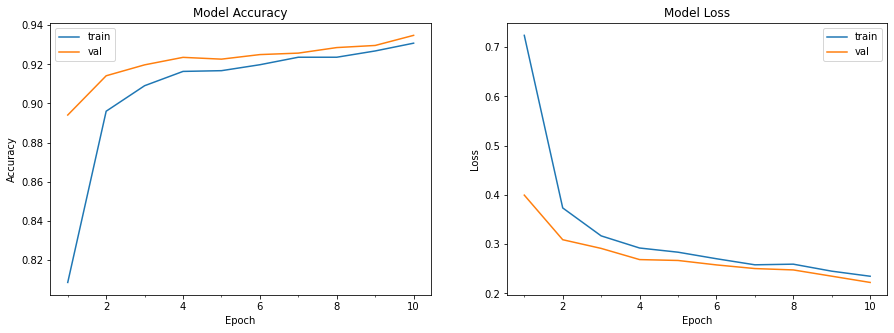

Model took 10.98 seconds to train
Accuracy on Test data is: 93.55%


In [25]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128,
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
* Changing the cost function to categorical crossentropy __reduced the training time.__ 
* The decrease in training time is significant when using SGD for this experiment.

## 6. Increase the Number of Epochs

In [26]:
# Define model
model = simple_nn()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fitting the model

In [ ]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128,
                       epochs=50, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 0.7056 - accuracy: 0.8110 - val_loss: 0.3921 - val_accuracy: 0.8937
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3711 - accuracy: 0.8980 - val_loss: 0.3181 - val_accuracy: 0.9096
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3171 - accuracy: 0.9096 - val_loss: 0.2872 - val_accuracy: 0.9175
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2915 - accuracy: 0.9167 - val_loss: 0.2874 - val_accuracy: 0.9162
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2781 - accuracy: 0.9193 - val_loss: 0.2629 - val_accuracy: 0.9262
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2623 - accuracy: 0.9244 - val_loss: 0.2408 - val_accuracy: 0.9305
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2379 - accuracy: 0.9296 - val_loss: 0.2452 - val_accuracy: 0.9253
Epoch 

### Observation - 
* As the number of epochs increase, more information is learned. 
* The __training as well as validation accuracy increases and then stabilizes.__

## 7. Deep Neural Network

Lets define a Deep Neural Network Model

In [ ]:
def deep_nn():
    # Define a deep neural network
    model = Sequential()
    # Adding Hidden Layers
    model.add(Dense(512, activation='relu', input_dim=num_input_nodes))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    # Adding Output Layer
    model.add(Dense(num_classes, activation='softmax'))
    return model

Compile the model

In [ ]:
# Define the Deep Neural Network
model = deep_nn()

# Define optimizer
sgd = SGD(lr=0.1)

# Compiling the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

In [ ]:
model.summary()

Fitting the model

In [ ]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128,
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
* By adding more hidden layers, __training time as well as information learned in each epoch increases.__ 
* It helps to improve the performance for complex tasks but __may not help significantly for relatively simple datasets such as MNIST.__

## 8. Save Model

Specify the directory to save the model - 

In [ ]:
from keras.callbacks import ModelCheckpoint
import os

# define a deep neural network
model = deep_nn()
# define optimizer
sgd = SGD(lr=0.1)
# Compiling the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# checkpoint
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"

In [ ]:
filepath

Checkpoint the model and save after every 10th epoch - 

In [ ]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=False, save_weights_only=True, 
                             mode='auto', period=2)
callbacks_list = [checkpoint]

# train the model
model_info = model.fit(train_features, train_labels, 
                       batch_size=128, 
                       epochs=10, 
                       callbacks=callbacks_list, 
                       verbose=1, 
                       validation_split=0.2)

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

## 9. Resume Training by Loading a Saved Model

* When __training big models, it is often convenient to break training into steps.__ (Here we load model after epoch 10)
* Train when you are not working, work when not training.

In [ ]:
# define model
model = deep_nn()

# load weights
import os, glob
epoch_num = 10
outputFolder = './output-mnist'
file_ini = outputFolder+'/weights-'+ str(epoch_num)+'*'
filename =  glob.glob(file_ini)
if os.path.isfile(filename[0]):
    model.load_weights(filename[0])
else:
    print ("%s does not exist"%filename[0])

# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# checkpoint
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"

Resume training, save model again for training later - 

In [ ]:
filepath=outputFolder+"/weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=False, save_weights_only=True,
                             mode='auto', period=2)
callbacks_list = [checkpoint]

# train the model
model_info = model.fit(train_features, train_labels, batch_size=128,
                       epochs=10, callbacks=callbacks_list, verbose=0,
                       validation_split=0.2, initial_epoch = epoch_num+1)

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

## 10. Early Stopping

* Early stopping helps as a form of regularization, __stopping training before validation loss starts increasing.__
* We define a term __patience in stopping as the no. of epochs to wait before termination__, even when loss increases, since it may decrease later.

In [ ]:
#define model
model = deep_nn()

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Define Early Stopping callback
earlystop = EarlyStopping(monitor='val_accuracy', 
                          min_delta=0.0001, 
                          patience=2, 
                          verbose=1, 
                          mode='auto')

# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=True,
                             mode='auto', 
                             period=2)

callbacks_list = [earlystop, checkpoint]

In [ ]:
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128,
                       epochs=50, 
                       callbacks=callbacks_list, 
                       verbose=1,
                       validation_split=0.2)
end = time.time()

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# plot model history
plot_model_history(model_info)

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))